<a href="https://colab.research.google.com/github/szhang12345/MSDS462/blob/main/week1/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MSDS462 Assignment 1
## Siying Zhang

Train a classification model for the Fashion MNIST Kaggle Project
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

Labels
Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot
TL;DR

Each row is a separate image
Column 1 is the class label.
Remaining columns are pixel numbers (784 total).
Each value is the darkness of the pixel (1 to 255)
Acknowledgements

## Import packages needed 

In [ ]:
# Helper libraries
import datetime
from packaging import version
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from collections import Counter
import numpy as np
import pandas as pd

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense


In [ ]:
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

### Verify TensorFlow Version and Keras Version

In [ ]:
print("This notebook requires TensorFlow 2.0 or above")
print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >=2

In [ ]:
print("Keras version: ", keras.__version__)

## Loading Fashion MNIST Dataset

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os;os.listdir("/content/gdrive/My Drive/Colab Notebooks/462")

[]

In [ ]:
data_train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/462/fashion-mnist_train.csv')
data_test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/462/fashion-mnist_test.csv')


In [ ]:
# Specify input dimentions and get shape
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Train data
X_train = np.array(data_train.iloc[:, 1:])
y_train = to_categorical(np.array(data_train.iloc[:, 0]))

# Test data
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

## EDA Training and Test Datasets


In [ ]:
print('x_train:\t{}'.format(X_train.shape))
print('y_train:\t{}'.format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(60000, 784)
y_train:	(60000, 10)
x_test:		(10000, 784)
y_test:		(10000, 10)


In [ ]:
Y_train = data_train["label"].values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


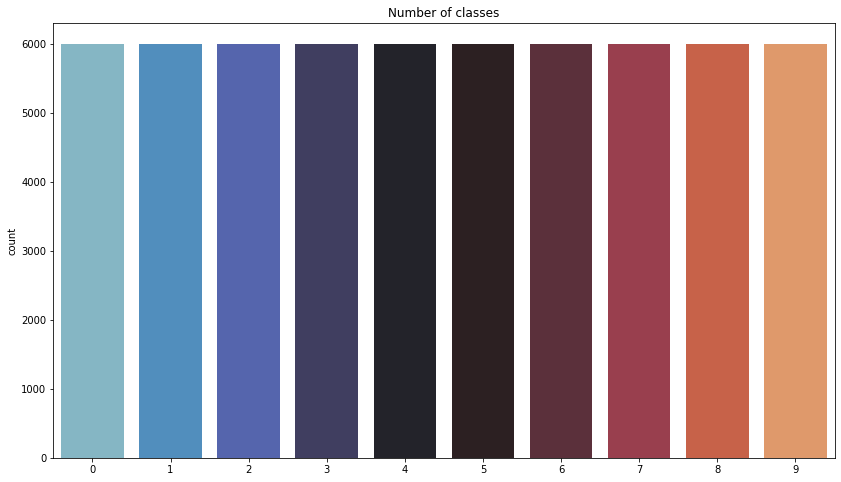

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(Y_train, palette="icefire")
plt.title("Number of classes")
plt.show()

In [ ]:
# put labels into Y_test variable
Y_test = data_test["label"].values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


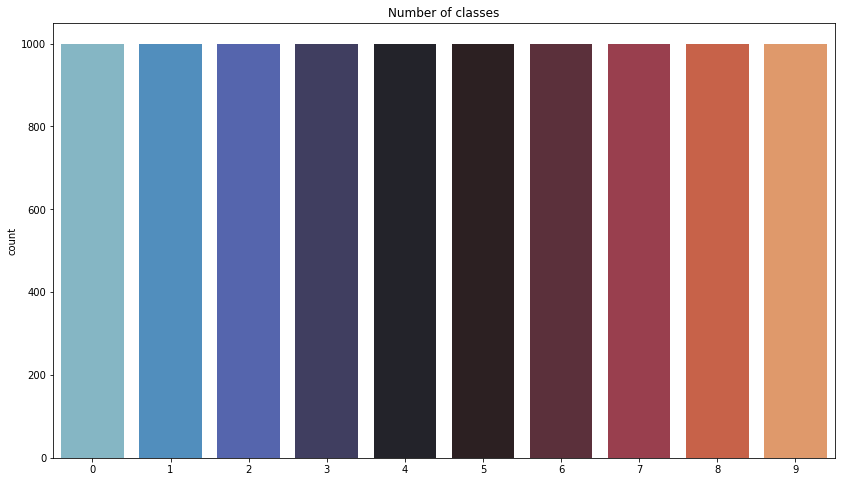

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(Y_test, palette="icefire")
plt.title("Number of classes")
plt.show()

### Plot Examples

In [ ]:
def get_three_classes(x, y):
    def indices_of(class_id):
        indices, _ = np.where(y == float(class_id))
        return indices

    indices = np.concatenate([indices_of(0), indices_of(1), indices_of(2)], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [ ]:
x_preview, y_preview = get_three_classes(X_train.reshape(-1,28,28), y_train)
x_preview_test, y_preview_test = get_three_classes(X_test.reshape(-1,28,28), y_test)

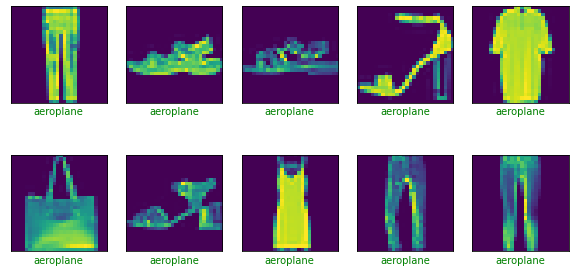

In [ ]:
class_names_preview = ['aeroplane', 'car', 'bird']

def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10, replace=False)
    
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names_preview[np.argmax(p[i])], color=col)
    plt.show()

show_random_examples(x_preview, y_preview, y_preview)

## Preprocessing Data for Model Development

### Image Shape

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255.

1. Each element in each example is a pixel value
2. Pixel values range from 0 to 255
3. 0 = black
4. 255 = white

### Preprocessing the Examples for CNN
 

In [ ]:
# Normalize the data
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
print('x_train:\t{}'.format(X_train.shape))
print('y_train:\t{}'.format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(60000, 28, 28, 1)
y_train:	(60000, 10)
x_test:		(10000, 28, 28, 1)
y_test:		(10000, 10)


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:

# Specify input dimentions and get shape
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Test data
X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

# Perform 80/20 split to generate validation datatset. Split here so data is
# shuffled (fit will pull the last 10% for validation if specified)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

# Test data
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

# Normalize the data
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255


In [ ]:
print('x_train:\t{}'.format(X_train.shape))
print('y_train:\t{}'.format(y_train.shape))
print('X_val:\t\t{}'.format(X_val.shape))
print('y_val:\t\t{}'.format(y_val.shape))

x_train:	(48000, 28, 28, 1)
y_train:	(48000, 10)
X_val:		(12000, 28, 28, 1)
y_val:		(12000, 10)


In [ ]:
input_shape = (img_rows, img_cols, 1)

## Create the Model

Metrics to track performance

In [ ]:
# Initialize a dictionary to track results
metrics = list()
data=dict()

# Metrics for evaluation
names = ['Model Name', 'Training Accuracy', 
         'Validation Accuracy', 'Test Accuracy','Training Loss', 
         'Validation Loss', 'Test Loss'
         'Time (s)']

### CNN Model Topology

We use a Sequential class defined in Keras to create our model. The Conv2D and MaxPooling layers handle feature learning.  The last 3 layers, handle classification.  

### Compiling the model

In addition to setting up our model architecture, we also need to define which algorithm should the model use in order to optimize the weights and biases as per the given data. We will use stochastic gradient descent.

We also need to define a loss function. Think of this function as the difference between the predicted outputs and the actual outputs given in the dataset. This loss needs to be minimised in order to have a higher model accuracy. That's what the optimization algorithm essentially does - it minimises the loss during model training. For our multi-class classification problem, categorical cross entropy is commonly used.

Finally, we will use the accuracy during training as a metric to keep track of as the model trains.

### CNN with 3 convolution/max pooling layers

In [ ]:
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization

In [ ]:
model = models.Sequential(name="model")

#1. LAYER
model.add(Conv2D(filters = 32, kernel_size = (3,3), kernel_initializer='he_uniform',padding = 'Same', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#3. LAYER
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))
#4. LAYER
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#FULLY CONNECTED LAYER
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.4))

model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_12 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
activation_12 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_13 (Batc (None, 14, 14, 64)        256   

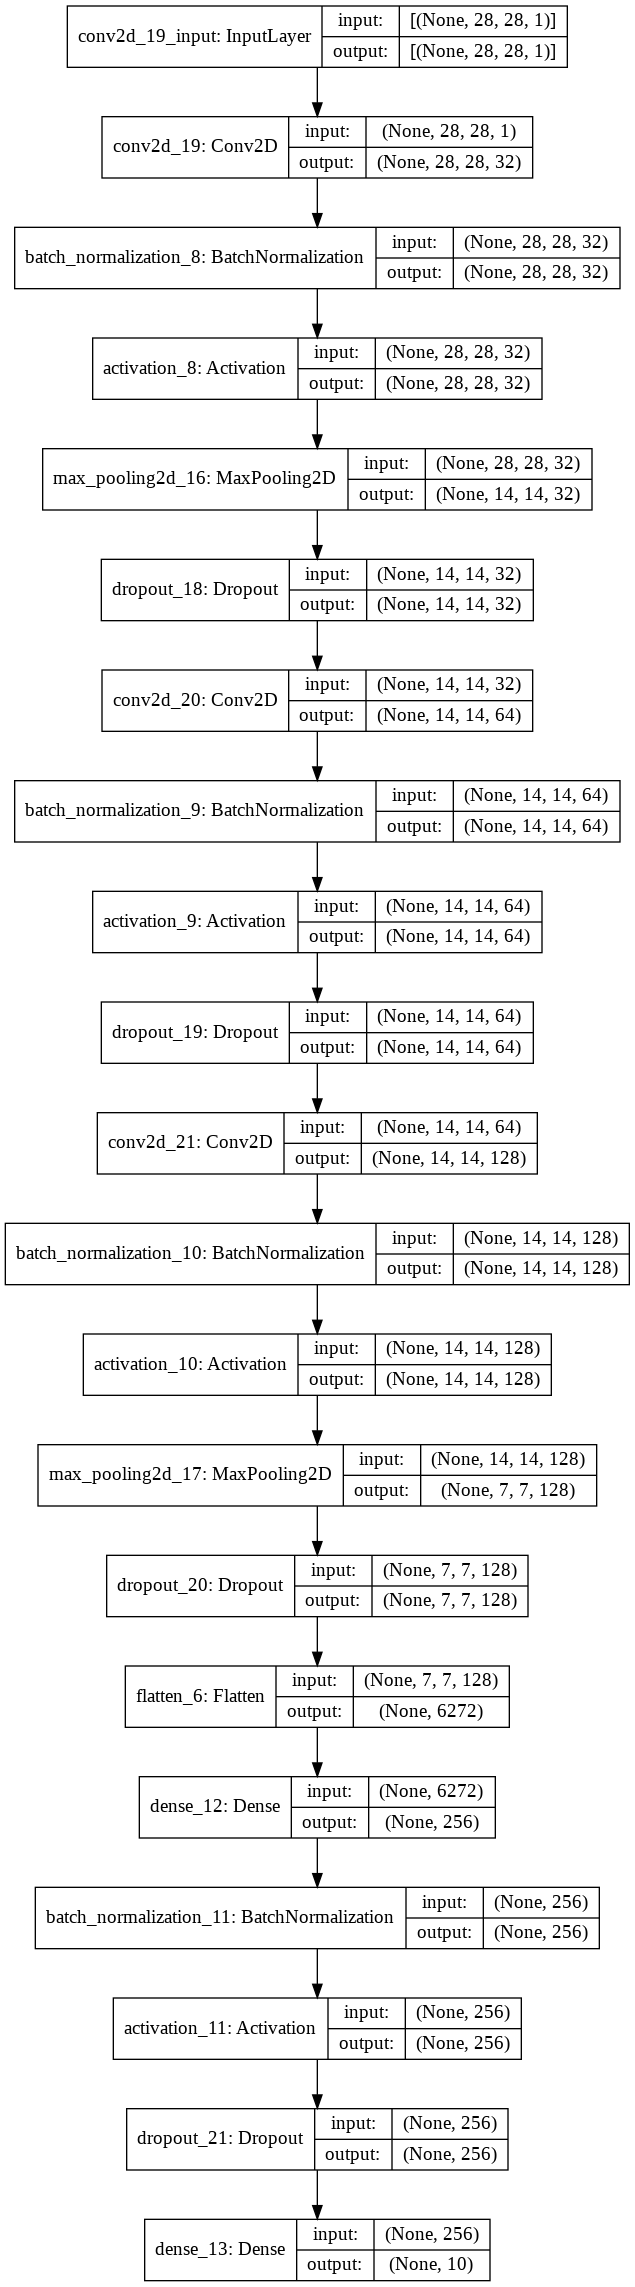

In [ ]:
keras.utils.plot_model(model, "Fashion_MNIST_model_1hnode.png", show_shapes=True) # plot a graph of the model

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
    
]

### Model Training

In [ ]:
# Start timer
start = datetime.datetime.now()
history = model.fit(X_train, y_train,
          batch_size=32,
          epochs=50,
          verbose = 1, 
          validation_data=(X_val, y_val))                                                                               
                   

# Record the time it takes
duration = datetime.datetime.now() - start


Epoch 1/50
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2970 - accuracy: 0.8919 - val_loss: 0.2874 - val_accuracy: 0.8931
Epoch 2/50
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2800 - accuracy: 0.8964 - val_loss: 0.2286 - val_accuracy: 0.9163
Epoch 3/50
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2612 - accuracy: 0.9050 - val_loss: 0.2275 - val_accuracy: 0.9135
Epoch 4/50
1500/1500 [==============================] - 17s 12ms/step - loss: 0.2426 - accuracy: 0.9121 - val_loss: 0.2114 - val_accuracy: 0.9215
Epoch 5/50
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2316 - accuracy: 0.9152 - val_loss: 0.2119 - val_accuracy: 0.9193
Epoch 6/50
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2225 - accuracy: 0.9182 - val_loss: 0.2017 - val_accuracy: 0.9245
Epoch 7/50
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2107 - accuracy: 0.9230 - val_loss: 0.2154 -

### Performance

#### Predictions

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('test set accuracy: ', test_accuracy)
preds = model.predict(X_test)
print('shape of preds: ', preds.shape)


313/313 [==============================] - 2s 6ms/step - loss: 0.1700 - accuracy: 0.9421
test set accuracy:  0.9420999884605408
shape of preds:  (10000, 10)


In [ ]:
history_dict = history.history
history_dict.keys()
history_df=pd.DataFrame(history_dict)
#history_df.tail().round(3)
last_train_acc=history_df.tail(1).accuracy.values
last_val_acc=history_df.tail(1).val_accuracy.values
last_train_loss=history_df.tail(1).loss.values
last_val_loss=history_df.tail(1).val_loss.values

#### Plotting Performance Metrics

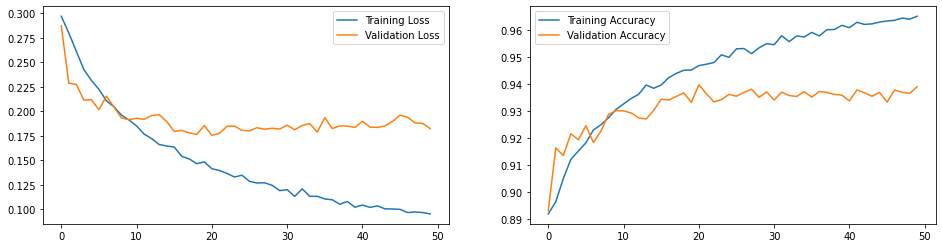

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [ ]:
metrics=list()
data8=dict()
data8['Model Name'] = "Model CNN with 3 convolution/max pooling layers"
data8['train_loss'] = history_dict['loss'][-1]
data8['train_acc'] = history_dict['accuracy'][-1]
data8['val_loss'] = history_dict['val_loss'][-1]
data8['val_acc'] = history_dict['val_accuracy'][-1]
data8['Test Accuracy']=test_accuracy
data8['Test Loss']=test_loss
data8['Time (s)']=duration
metrics.append(data8)


In [ ]:
pd.DataFrame(metrics)

Model Name  ...               Time (s)
0  Model CNN with 3 convolution/max pooling layers  ... 0 days 00:15:22.023125

[1 rows x 8 columns]

#### Confusion matrices

Let us see what the confusion matrix looks like. Using both `sklearn.metrics`. Then we visualize the confusion matrix and see what that tells us.

Get the predicted classes

In [ ]:
Y_test =data_test["label"].values

In [ ]:
pred_classes = model.predict(X_test)
pred_classes = np.argmax(pred_classes, axis = 1)


In [ ]:
conf_mx = tf.math.confusion_matrix(Y_test, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[899,   2,  15,  10,   1,   0,  67,   0,   6,   0],
       [  0, 995,   0,   4,   0,   0,   1,   0,   0,   0],
       [ 15,   1, 909,  17,  28,   0,  30,   0,   0,   0],
       [  8,   6,   2, 951,  14,   0,  19,   0,   0,   0],
       [  0,   0,  24,  19, 906,   0,  50,   0,   1,   0],
       [  0,   0,   0,   1,   0, 981,   0,  13,   1,   4],
       [ 77,   2,  40,  18,  29,   0, 833,   0,   1,   0],
       [  0,   0,   0,   0,   0,   1,   0, 987,   0,  12],
       [  1,   0,   1,   1,   0,   0,   2,   2, 993,   0],
       [  0,   0,   0,   0,   0,   0,   0,  33,   0, 967]], dtype=int32)>

### Visualizing the confusion matrix

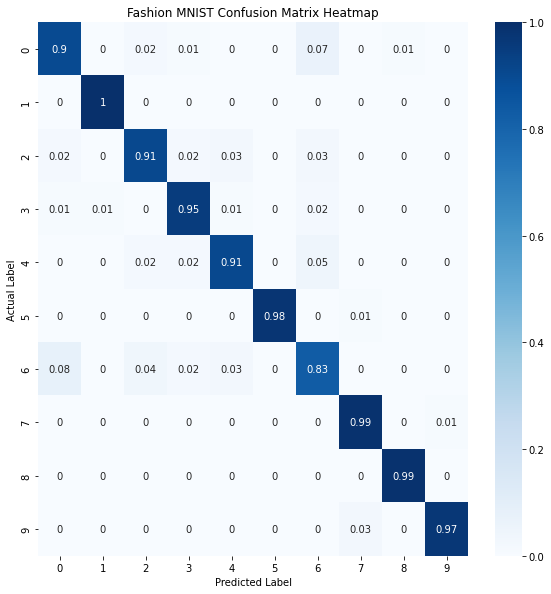

In [ ]:
con_mat = conf_mx.numpy()
classes=[0,1,2,3,4,5,6,7,8,9]
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues,)
plt.tight_layout()
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Fashion MNIST Confusion Matrix Heatmap')
#plt.savefig("confusion_matrix_plot_mnist_1", tight_layout=True)
plt.show()

In [ ]:
!pip install keract

In [ ]:
import keract

conv2d_25_input (1, 28, 28, 1) 


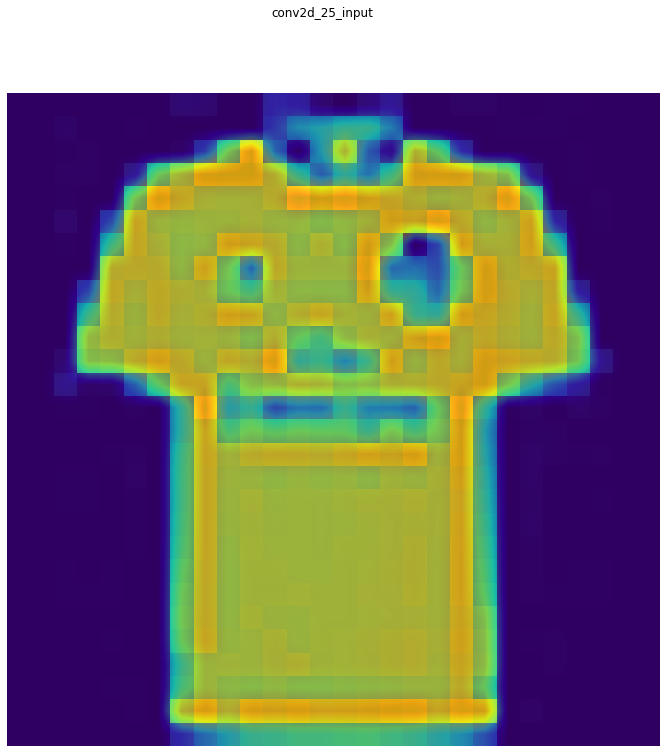

conv2d_25 (1, 28, 28, 32) 


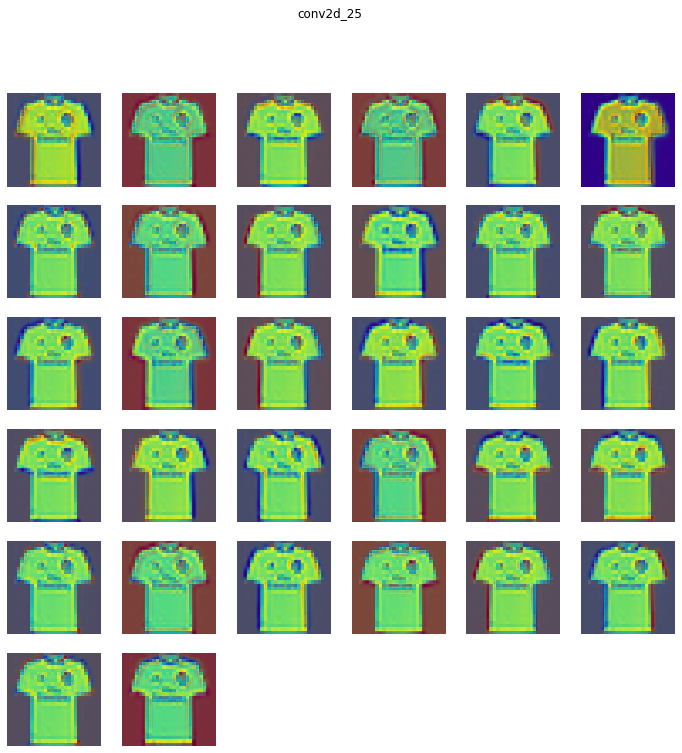

batch_normalization_16 (1, 28, 28, 32) 


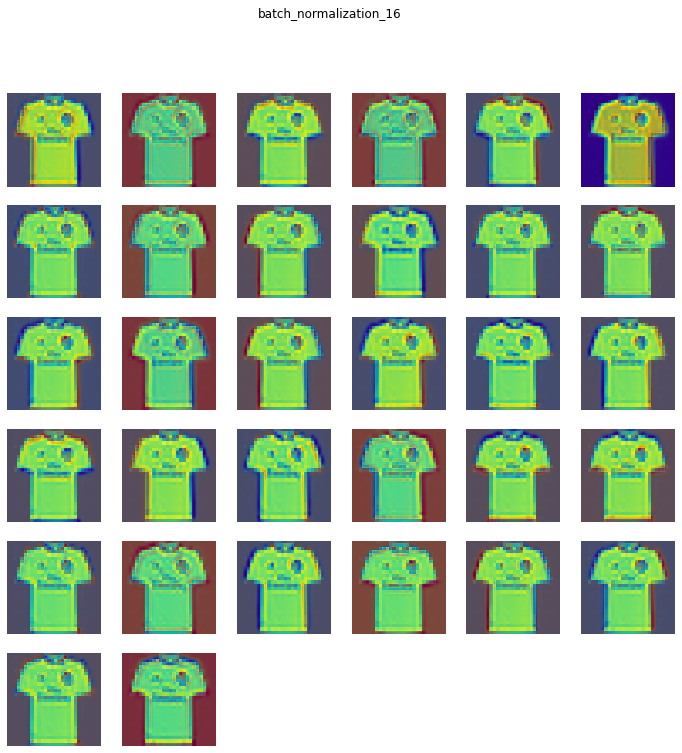

activation_16 (1, 28, 28, 32) 


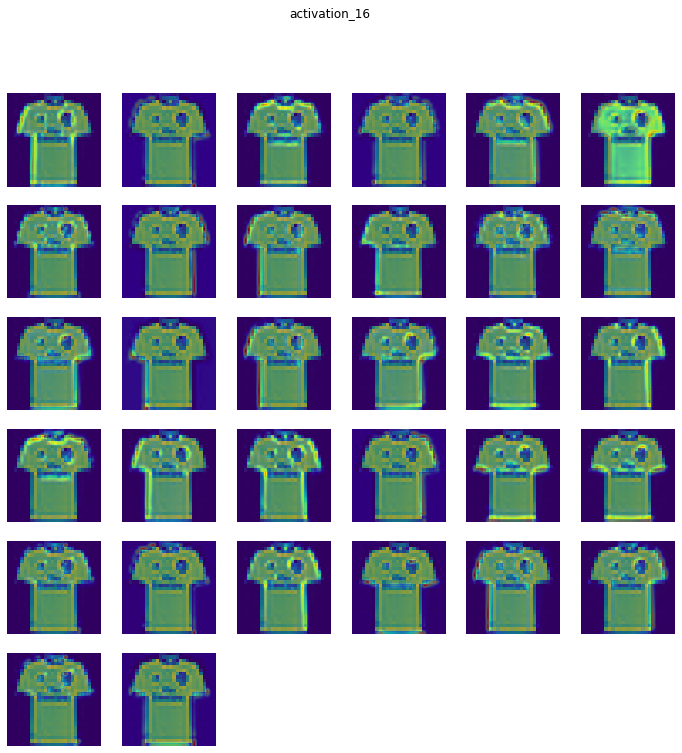

max_pooling2d_20 (1, 14, 14, 32) 


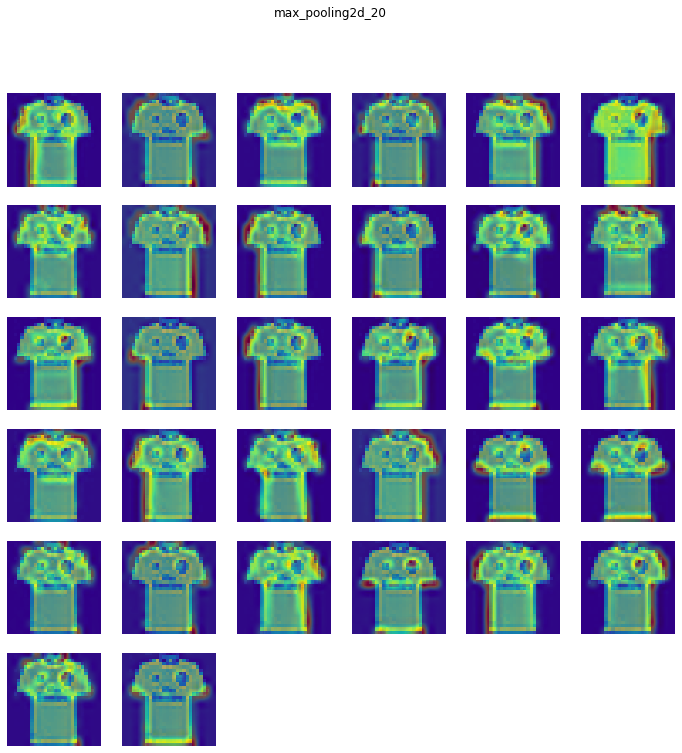

dropout_26 (1, 14, 14, 32) 


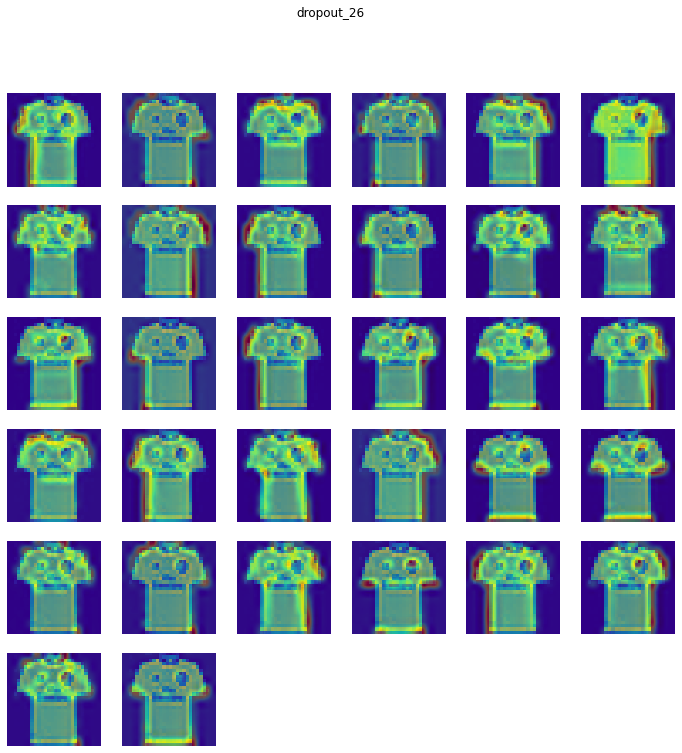

conv2d_26 (1, 14, 14, 64) 


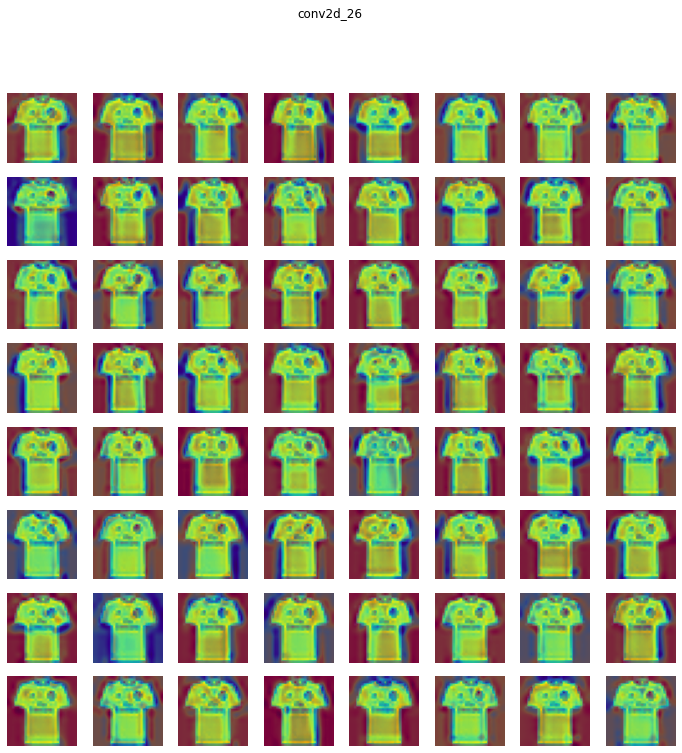

batch_normalization_17 (1, 14, 14, 64) 


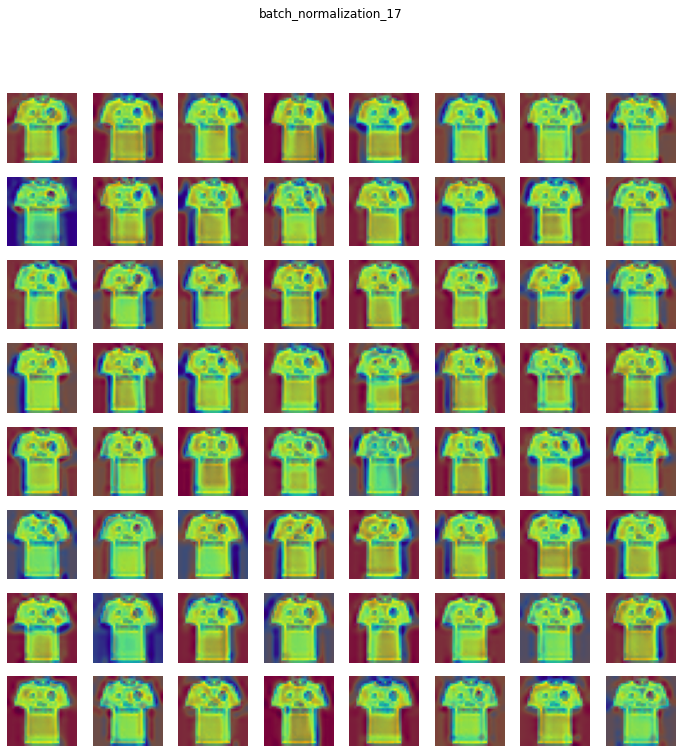

activation_17 (1, 14, 14, 64) 


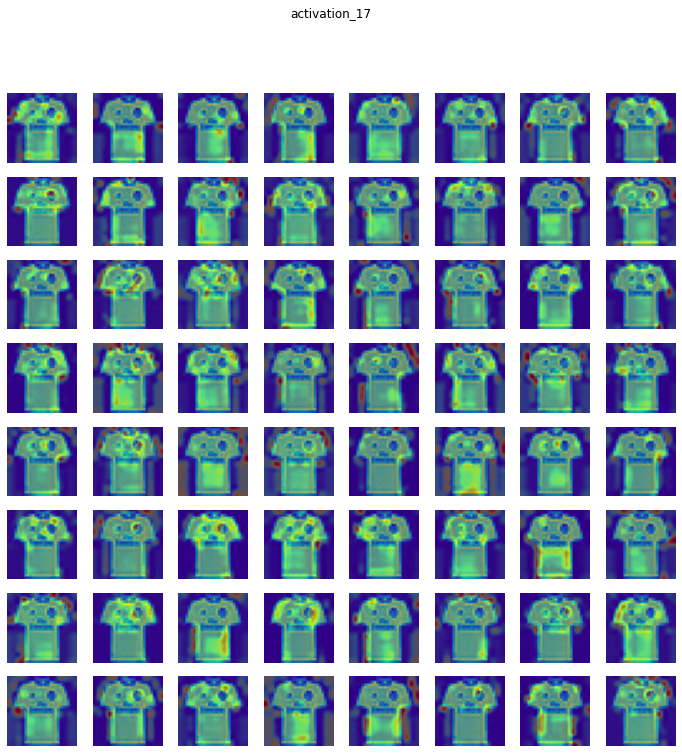

dropout_27 (1, 14, 14, 64) 


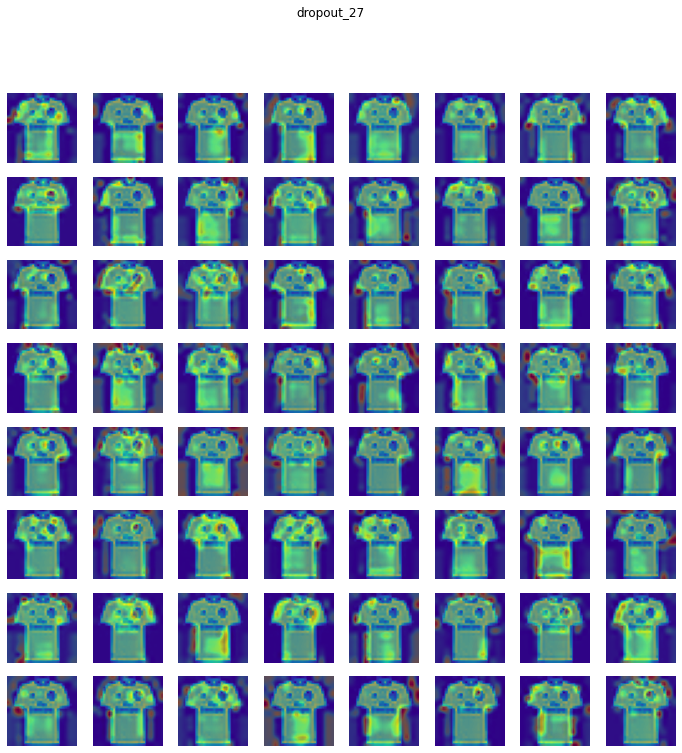

conv2d_27 (1, 14, 14, 128) 


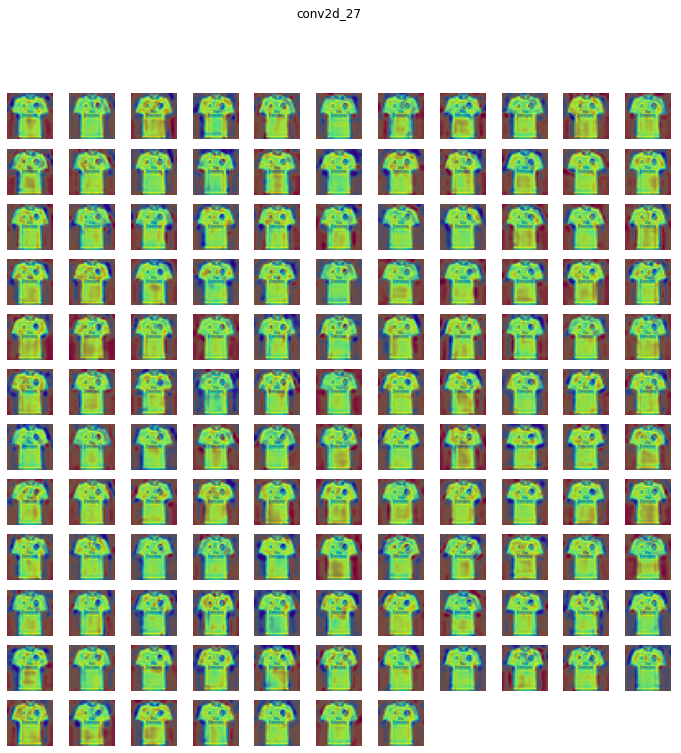

batch_normalization_18 (1, 14, 14, 128) 


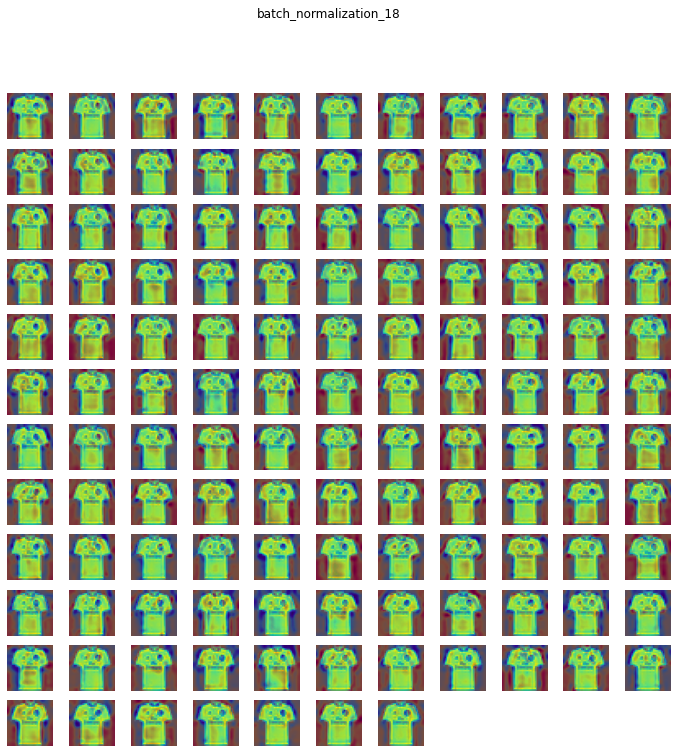

activation_18 (1, 14, 14, 128) 


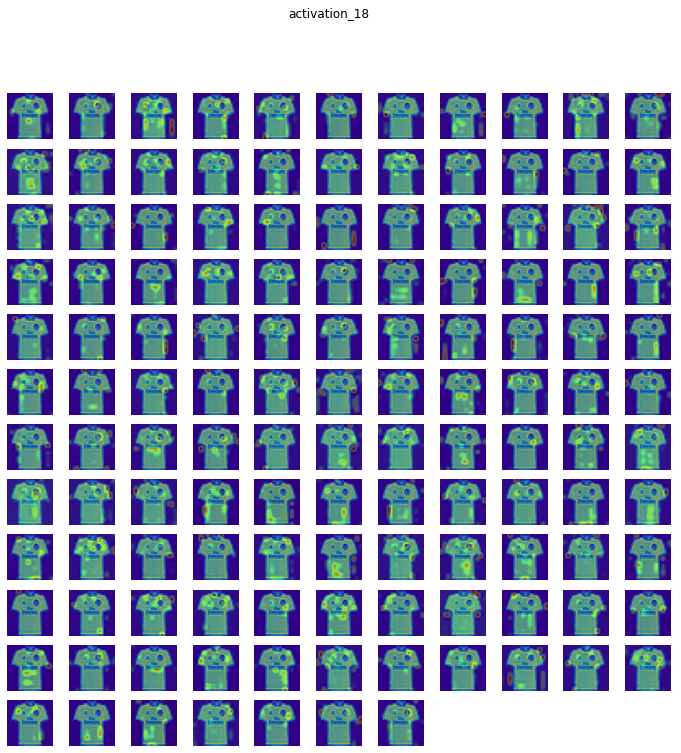

max_pooling2d_21 (1, 7, 7, 128) 


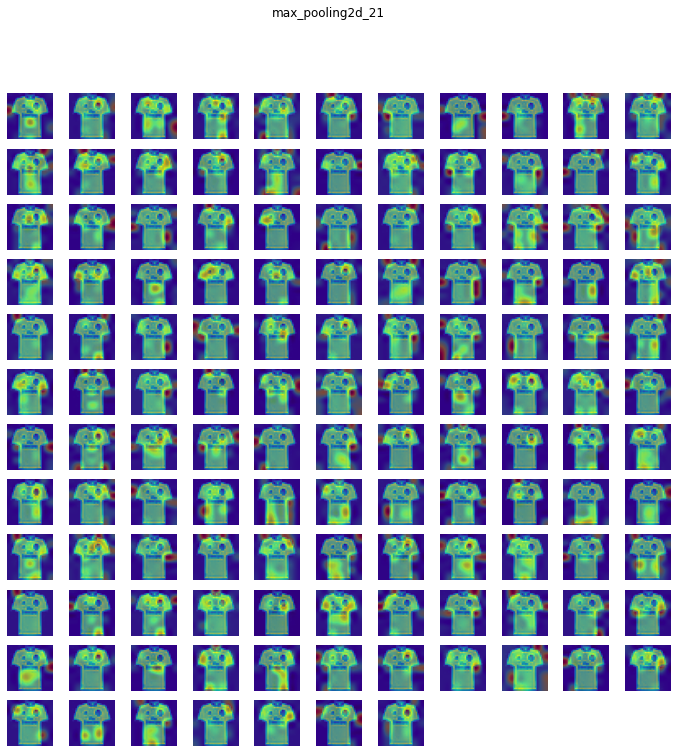

dropout_28 (1, 7, 7, 128) 


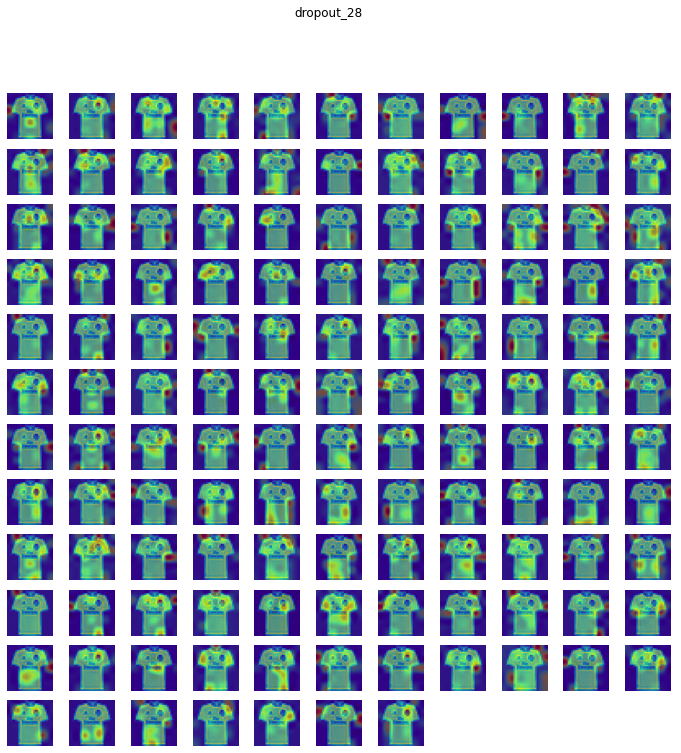

flatten_8 (1, 6272) -> Skipped. 2D Activations.
dense_16 (1, 128) -> Skipped. 2D Activations.
batch_normalization_19 (1, 128) -> Skipped. 2D Activations.
activation_19 (1, 128) -> Skipped. 2D Activations.
dropout_29 (1, 128) -> Skipped. 2D Activations.
dense_17 (1, 10) -> Skipped. 2D Activations.


In [ ]:
from keract import get_activations, display_heatmaps
keract_inputs = X_test[:1]
keract_targets = y_test[:1]
activations = get_activations(model, keract_inputs)
display_heatmaps(activations, keract_inputs, save=False)

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
df = pd.DataFrame(preds[0:20], columns = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
df.style.format("{:.2%}").background_gradient(cmap=cm)